In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We see only two feauture with linear values- age and bmi

AGE

Text(0.5, 1.0, 'Age vs Charges')

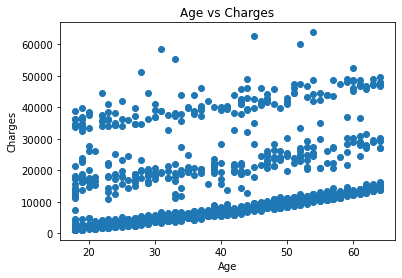

In [5]:
plt.scatter(df['age'], df['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges')

In [6]:
corr, _ = pearsonr(df['age'],df['charges'])
print("Correlation between AGE and CHARGES ---> ", corr)

Correlation between AGE and CHARGES --->  0.29900819333064765


We see that the graph is mainly distributed into 2-3 parts..
Lets see the effect of a smoker and non-smoker on this graph.

Text(70, 50000, 'Red:Smoker      Blue:Non-Smoker')

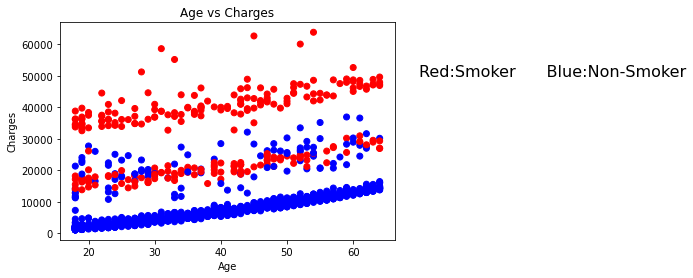

In [7]:
colors={'yes':'red','no':'blue'}
plt.scatter(df['age'], df['charges'],c=df['smoker'].map(colors))
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges')
plt.text(x=70, y=50000,s='Red:Smoker      Blue:Non-Smoker', fontsize=16)

Hence we can see that we can segregate the data for smoker and non-smoker and train different models on both

SMOKER

In [8]:
def model(x,Y, regularization=0, power=1):
    X=np.ones(x.shape[0])
    temp=np.ones(x.shape[0])
    for i in range(power):
        temp=temp*x
        X=np.c_[X,temp]
    theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)+regularization),X.T),Y)
    Y_pred=np.dot(X,theta)
    loss=np.sum(np.square(Y-Y_pred))/x.shape[0] + regularization*np.sum(np.square(theta))
    return theta,Y_pred,loss

In [9]:
def model1(x,Y, regularization=0, power=1):
    temp=np.ones(x.shape[0])
    X=np.c_[x,temp]
    theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)+regularization),X.T),Y)
    Y_pred=np.dot(X,theta)
    loss=np.sum(np.square(Y-Y_pred))/x.shape[0] + regularization*np.sum(np.square(theta))
    return theta,Y_pred,loss

In [10]:
def graph(x,Y,power,df_smoker):
    theta, Y_pred, loss=model(x,Y,regularization=0,power=power)
    plt.scatter(df_smoker['age'], df_smoker['charges'])
    plt.plot(x,Y_pred,'r+')
    plt.ylabel('Charges')
    plt.xlabel('Age')
    plt.title('Age vs Charges')
    print('loss = ',loss)

In [11]:
df_smoker=df[df['smoker']=='yes']
x=df_smoker['age'].to_numpy()
Y=df_smoker['charges'].to_numpy()


In [12]:
corr, _ = pearsonr(df_smoker['age'],df_smoker['charges'])
print("Correlation b/w AGE and CHARGES for smokers", corr)

Correlation b/w AGE and CHARGES for smokers 0.3682244437307778


loss =  114732814.51227982


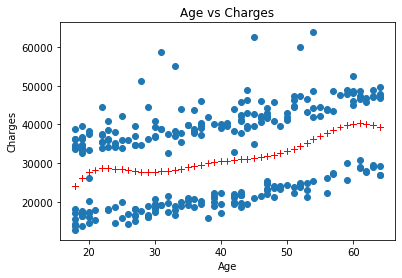

In [13]:
graph(x,Y,10,df_smoker)

We can see still our graph is distributed in two parts...
So we can much more segregate it by dividing it in two parts -
(1) People with BMI <=30.
(2) People with BMI >30.

Lets see...

In [14]:
df_smoker_high=df_smoker[df_smoker['bmi']>30]
df_smoker_low=df_smoker[df_smoker['bmi']<=30]

BMI>30

Text(0.5, 1.0, 'Age vs Charges For Smokers with BMI>30')

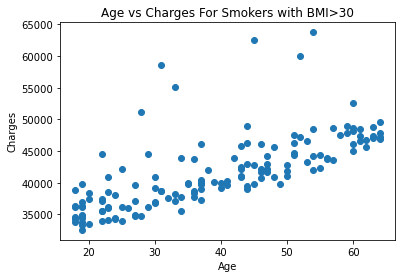

In [15]:
plt.scatter(df_smoker_high['age'], df_smoker_high['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Smokers with BMI>30')

We can see that this is a good distribution for our linear regression model..
We can improve a bit by removing the points with charges >50,000
This will improve our model.

In [16]:
df_smoker_high=df_smoker_high[df_smoker_high['charges']<=50000]

Text(0.5, 1.0, 'Age vs Charges For Smokers with BMI>30')

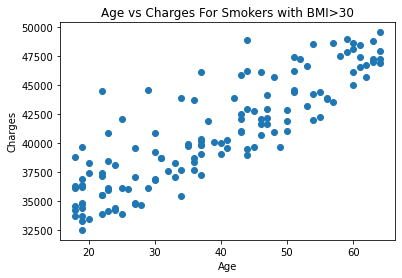

In [17]:
plt.scatter(df_smoker_high['age'], df_smoker_high['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Smokers with BMI>30')

In [18]:
corr, _ = pearsonr(df_smoker_high['age'],df_smoker_high['charges'])
print("Correlation b/w AGE and CHARGES", corr)

Correlation b/w AGE and CHARGES 0.8623745411239981


We can see that we are having a high correlation as compared to previous ones..

In [19]:
df_smoker_high.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [20]:
df_smoker_high=df_smoker_high.replace({'male':0, 'female':1, 'northwest':0, 'northeast':1, 'southwest':2, 'southeast':3})

In [21]:
x=df_smoker_high.drop(columns=['charges','smoker']).to_numpy()
Y=df_smoker_high['charges'].to_numpy()

In [22]:
theta1,Y_pred,loss = model1(x,Y)

In [23]:
xp=df_smoker_high['age'].to_numpy()

In [24]:
print(Y_pred[:10])

[39929.23807511 37682.26866774 38447.61876133 39267.23853439
 35700.95984067 40327.09264273 47863.72934642 39409.05083993
 38619.64179825 47232.80705825]


In [25]:
print(Y[:10])

[39611.7577  36837.467   37701.8768  38711.      35585.576   39774.2763
 48173.361   38709.176   37742.5757  47496.49445]


Text(0.5, 1.0, 'Age vs Charges For Smokers with BMI>30')

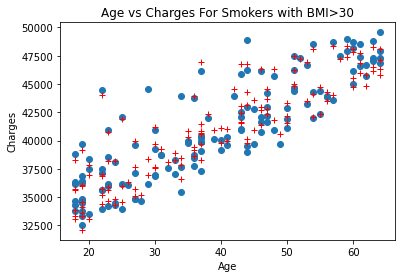

In [26]:
plt.scatter(df_smoker_high['age'], df_smoker_high['charges'])
plt.plot(xp,Y_pred,'r+')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Smokers with BMI>30')

BMI<=30

Text(0.5, 1.0, 'Age vs Charges For Smokers with BMI<=30')

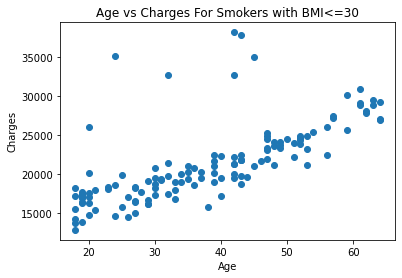

In [27]:
plt.scatter(df_smoker_low['age'], df_smoker_low['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Smokers with BMI<=30')

This is good..
But we can improve by putting an upper limit on charges i.e. 30,000.

In [28]:
df_smoker_low=df_smoker_low[df_smoker_low['charges']<=30000]

Text(0.5, 1.0, 'Age vs Charges For Smokers with BMI<=30')

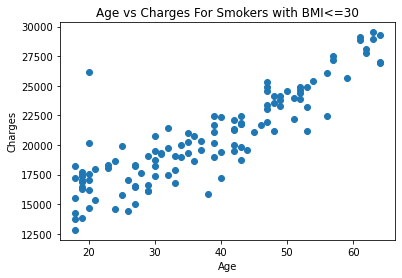

In [29]:
plt.scatter(df_smoker_low['age'], df_smoker_low['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Smokers with BMI<=30')

In [30]:
corr, _ = pearsonr(df_smoker_high['age'],df_smoker_high['charges'])
print("Correlation b/w AGE and CHARGES", corr)

Correlation b/w AGE and CHARGES 0.8623745411239981


In [31]:
df_smoker_low.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
52,48,male,28.00,1,yes,southwest,23568.2720
58,53,female,22.88,1,yes,southeast,23244.7902
64,20,female,22.42,0,yes,northwest,14711.7438


In [32]:
df_smoker_low=df_smoker_low.replace({'male':0, 'female':1, 'northwest':0, 'northeast':1, 'southwest':2, 'southeast':3})

In [33]:
x=df_smoker_low.drop(columns=['charges','smoker']).to_numpy()
Y=df_smoker_low['charges'].to_numpy()

In [34]:
theta2,Y_pred,loss = model1(x,Y)

Text(0.5, 1.0, 'Age vs Charges For Smokers with BMI<=30')

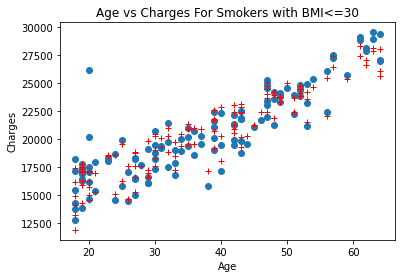

In [35]:
xp=df_smoker_low['age'].to_numpy()
plt.scatter(df_smoker_low['age'], df_smoker_low['charges'])
plt.plot(xp,Y_pred,'r+')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Smokers with BMI<=30')

Non-Smoker

In [36]:
df_non_smoker=df[df['smoker']=='no']
x=df_non_smoker['age'].to_numpy()
Y=df_non_smoker['charges'].to_numpy()

In [37]:
corr, _ = pearsonr(df_non_smoker['age'],df_non_smoker['charges'])
print("Correlation b/w AGE and CHARGES for non-smokers", corr)

Correlation b/w AGE and CHARGES for non-smokers 0.6279467837664197


loss =  21420560.700660802


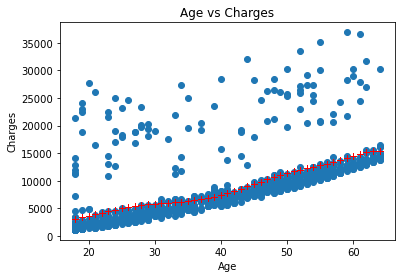

In [38]:
graph(x,Y,8,df_non_smoker)

We see that though the model is fine but we can try to segregate it similarly using BMI..

In [39]:
df_non_smoker_high=df_non_smoker[df_non_smoker['bmi']>30]
df_non_smoker_low=df_non_smoker[df_non_smoker['bmi']<=30]

BMI>30

Text(0.5, 1.0, 'Age vs Charges For Non-Smokers with BMI>30')

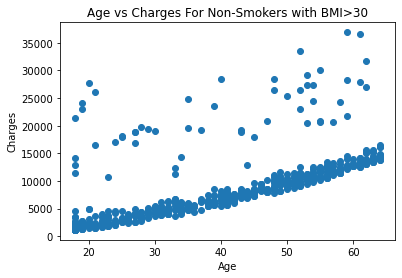

In [40]:
plt.scatter(df_non_smoker_high['age'], df_non_smoker_high['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Non-Smokers with BMI>30')

BMI<=30

Text(0.5, 1.0, 'Age vs Charges For Non-Smokers with BMI<=30')

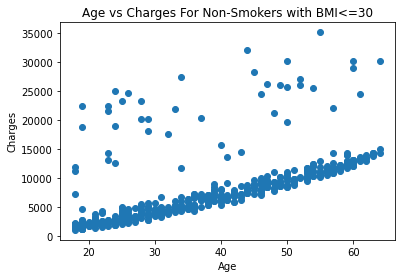

In [41]:
plt.scatter(df_non_smoker_low['age'], df_non_smoker_low['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Non-Smokers with BMI<=30')

We see that we are unable to segregate the data on the basis of BMI.


So, lets put an upper bound of 16,000 on charges on the non-smoker dataset

In [42]:
df_non_smoker=df_non_smoker[df_non_smoker['charges']<=16000]

Text(0.5, 1.0, 'Age vs Charges For Non-Smokers')

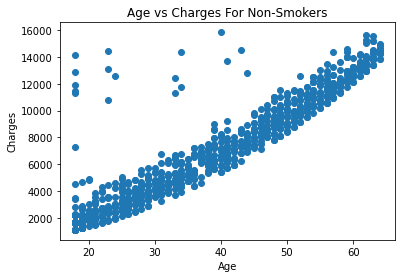

In [43]:
plt.scatter(df_non_smoker['age'], df_non_smoker['charges'])
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Non-Smokers')

In [44]:
corr, _ = pearsonr(df_non_smoker['age'],df_non_smoker['charges'])
print("Correlation b/w AGE and CHARGES for non-smokers", corr)

Correlation b/w AGE and CHARGES for non-smokers 0.9287459037578168


In [45]:
df_non_smoker=df_non_smoker.replace({'male':0, 'female':1, 'northwest':0, 'northeast':1, 'southwest':2, 'southeast':3})

In [46]:
x=df_non_smoker.drop(columns=['charges','smoker']).to_numpy()
Y=df_non_smoker['charges'].to_numpy()

In [47]:
theta3,Y_pred,loss = model1(x,Y)

Text(0.5, 1.0, 'Age vs Charges For Non-Smokers')

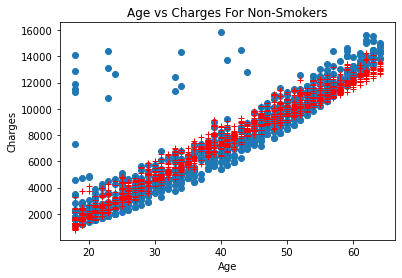

In [48]:
xp=df_non_smoker['age'].to_numpy()
plt.scatter(df_non_smoker['age'], df_non_smoker['charges'])
plt.plot(xp,Y_pred,'r+')
plt.ylabel('Charges')
plt.xlabel('Age')
plt.title('Age vs Charges For Non-Smokers')

PREDICTIONS

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
def predict(x):
    yp=[]
    x1=np.append(x,[1])
    x1=np.append(x1[:4],x1[5:])
    if x[4]==1:
        if x[2]>30:
            yp=np.dot(x1,theta1)
        else:
            yp=np.dot(x1,theta2)
    else:
        yp=np.dot(x1,theta3)
    return yp

In [51]:
x=np.array([45,1,26.6,2,0,1])
print(predict(x))

9287.558552264327
